In [4]:
x = True  # Здесь подставьте значение переменной x (True или False)
y = False  # Здесь подставьте значение переменной y (True или False)
z = True  # Здесь подставьте значение переменной z (True или False)

result = (not x and y and z) or (not x and not y and z) or (not x and not y and not z)

print(result)  # Вывод результата вычисления выражения


False


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tqdm.auto import tqdm
from sklearn.metrics import accuracy_score, classification_report

tqdm.pandas()

In [3]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# **Лабораторная работа № 4**

### *Задача восстановления зависимостей. Манипулирование признаками. Сокращение размерности.*

> ##### 1. Выбрать подходящую таблицу данных (должна содержать числовые и категориальные переменные). Временно убрать категориальные признаки. Построить линейную регрессию.
> ##### 2. Построить решение методом бустинга. Сравнить с линейной регрессией.
> ##### 3. Применить one hot и target encoding для категориальных признаков (взять данные, где такие признаки есть). Сравнить точность.
> ##### 4. Визуализировать объекты (не обязательно для той же таблицы) в пространстве главных компонент.


### Preprocess

In [4]:
df_full= pd.read_csv("adult.csv")
# Кодируем искомую переменную (0 - меньше 50к доход, 1 - больше 50к доход)
df_full['income'] = df_full['income'].progress_apply(lambda x: 0 if x == "<=50K" else 1)

print(df_full.shape)
df_full.head(10)

  0%|          | 0/32561 [00:00<?, ?it/s]

(32561, 15)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,1
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,0
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,1


### Some data process

In [5]:
df_noCat = df_full.drop(["workclass", "education", "marital.status", "occupation", "relationship", "race", "native.country", "sex"], axis=1)

df_noCat.head(10)

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
0,90,77053,9,0,4356,40,0
1,82,132870,9,0,4356,18,0
2,66,186061,10,0,4356,40,0
3,54,140359,4,0,3900,40,0
4,41,264663,10,0,3900,40,0
5,34,216864,9,0,3770,45,0
6,38,150601,6,0,3770,40,0
7,74,88638,16,0,3683,20,1
8,68,422013,9,0,3683,40,0
9,41,70037,10,0,3004,60,1


d:\Programming\TeorStat\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


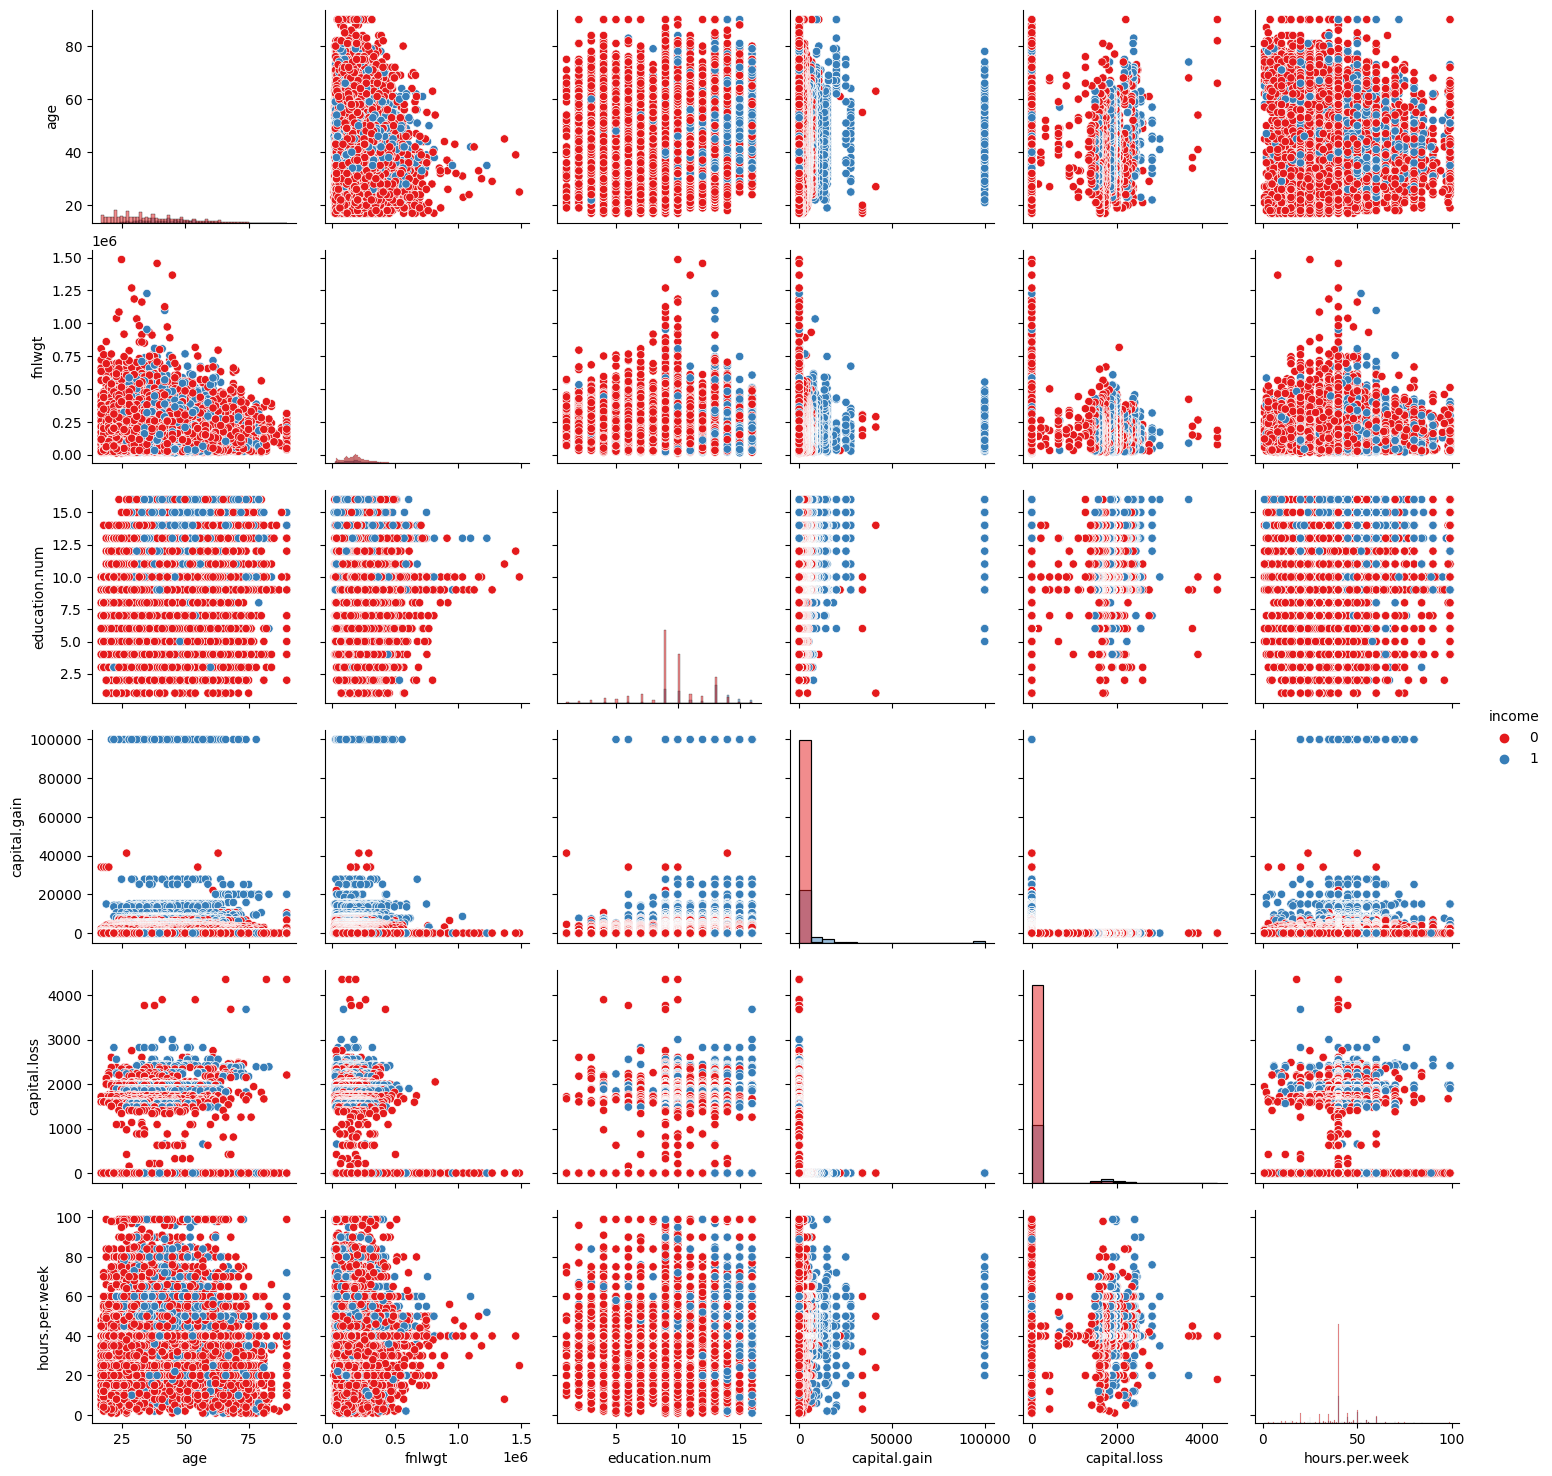

In [6]:
sns.pairplot(df_noCat, hue='income', diag_kind='hist', palette='Set1')

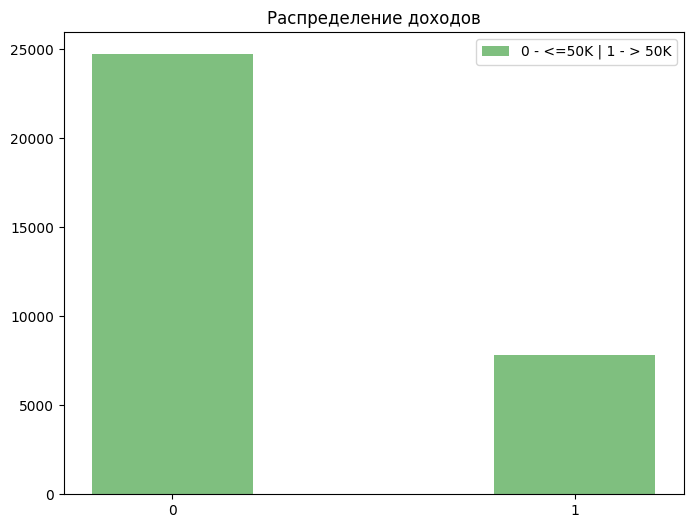

In [7]:
xs_noCat = df_noCat.drop("income", axis=1)
ys_noCat = df_noCat["income"]

x_train, x_test, y_train, y_test = train_test_split(xs_noCat, ys_noCat, test_size=0.3, random_state=4242)

plt.figure(figsize=(8, 6))
plt.title("Распределение доходов")
plt.bar(ys_noCat.value_counts().index, ys_noCat.value_counts(), width=0.4, color='green', alpha=0.5, label="0 - <=50K | 1 - > 50K")
plt.xticks([0, 1])
plt.legend()
plt.show()

### Regression (Logistic)

In [8]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(LogRec1 := classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.96      0.88      7386
           1       0.70      0.26      0.38      2383

    accuracy                           0.79      9769
   macro avg       0.75      0.61      0.63      9769
weighted avg       0.78      0.79      0.75      9769



### Boosting (AdaBoost)

In [9]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(estimator=LogisticRegression(), n_estimators=250)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(Ada1 :=classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      7386
           1       0.74      0.23      0.35      2383

    accuracy                           0.79      9769
   macro avg       0.77      0.60      0.61      9769
weighted avg       0.78      0.79      0.75      9769



In [10]:
df_Cats = df_full[["workclass", "education", "marital.status", "occupation", "relationship", "race", "native.country", "sex"]]

df_one_hot = pd.get_dummies(df_Cats)

print(df_one_hot.shape)
df_one_hot.head(10)

(32561, 102)


,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,...,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,sex_Female,sex_Male
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
5,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
6,False,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,True
7,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False
8,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
9,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [11]:
df_cat_noCat = pd.concat([df_noCat, df_one_hot], axis=1) 

df_cat_noCat.head(10)

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_?,workclass_Federal-gov,workclass_Local-gov,...,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,sex_Female,sex_Male
0,90,77053,9,0,4356,40,0,True,False,False,...,False,False,False,False,False,True,False,False,True,False
1,82,132870,9,0,4356,18,0,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2,66,186061,10,0,4356,40,0,True,False,False,...,False,False,False,False,False,True,False,False,True,False
3,54,140359,4,0,3900,40,0,False,False,False,...,False,False,False,False,False,True,False,False,True,False
4,41,264663,10,0,3900,40,0,False,False,False,...,False,False,False,False,False,True,False,False,True,False
5,34,216864,9,0,3770,45,0,False,False,False,...,False,False,False,False,False,True,False,False,True,False
6,38,150601,6,0,3770,40,0,False,False,False,...,False,False,False,False,False,True,False,False,False,True
7,74,88638,16,0,3683,20,1,False,False,False,...,False,False,False,False,False,True,False,False,True,False
8,68,422013,9,0,3683,40,0,False,True,False,...,False,False,False,False,False,True,False,False,True,False
9,41,70037,10,0,3004,60,1,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [12]:
xs_cat_noCat = df_cat_noCat.drop("income", axis=1)
ys_cat_noCat = df_cat_noCat["income"]

x_train, x_test, y_train, y_test = train_test_split(xs_cat_noCat, ys_cat_noCat, test_size=0.3, random_state=4242)

## Logistic Regression

In [13]:
model = LogisticRegression(max_iter=250)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Only no cat")
print(LogRec1)

print("Both")
print(LogRec2 := classification_report(y_test, y_pred))

Only no cat
              precision    recall  f1-score   support

           0       0.80      0.96      0.88      7386
           1       0.70      0.26      0.38      2383

    accuracy                           0.79      9769
   macro avg       0.75      0.61      0.63      9769
weighted avg       0.78      0.79      0.75      9769

Both
              precision    recall  f1-score   support

           0       0.80      0.96      0.88      7386
           1       0.70      0.26      0.38      2383

    accuracy                           0.79      9769
   macro avg       0.75      0.61      0.63      9769
weighted avg       0.78      0.79      0.75      9769



## Ada boost

In [14]:
model = AdaBoostClassifier(estimator=LogisticRegression(max_iter=250), n_estimators=250)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Only no cat")
print(Ada1)

print("Both")
print(Ada2 := classification_report(y_test, y_pred))

Only no cat
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      7386
           1       0.74      0.23      0.35      2383

    accuracy                           0.79      9769
   macro avg       0.77      0.60      0.61      9769
weighted avg       0.78      0.79      0.75      9769

Both
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      7386
           1       0.82      0.27      0.41      2383

    accuracy                           0.81      9769
   macro avg       0.81      0.63      0.65      9769
weighted avg       0.81      0.81      0.77      9769



### Декомпозиция в пространстве главных компонент

#### **Главные компоненты (Principal Components) - это новые признаки, которые создаются из исходных признаков с помощью линейных комбинаций. Они используются для уменьшения размерности данных и выделения наиболее важных признаков. Главные компоненты выбираются таким образом, чтобы они объясняли максимальное количество дисперсии в данных.**

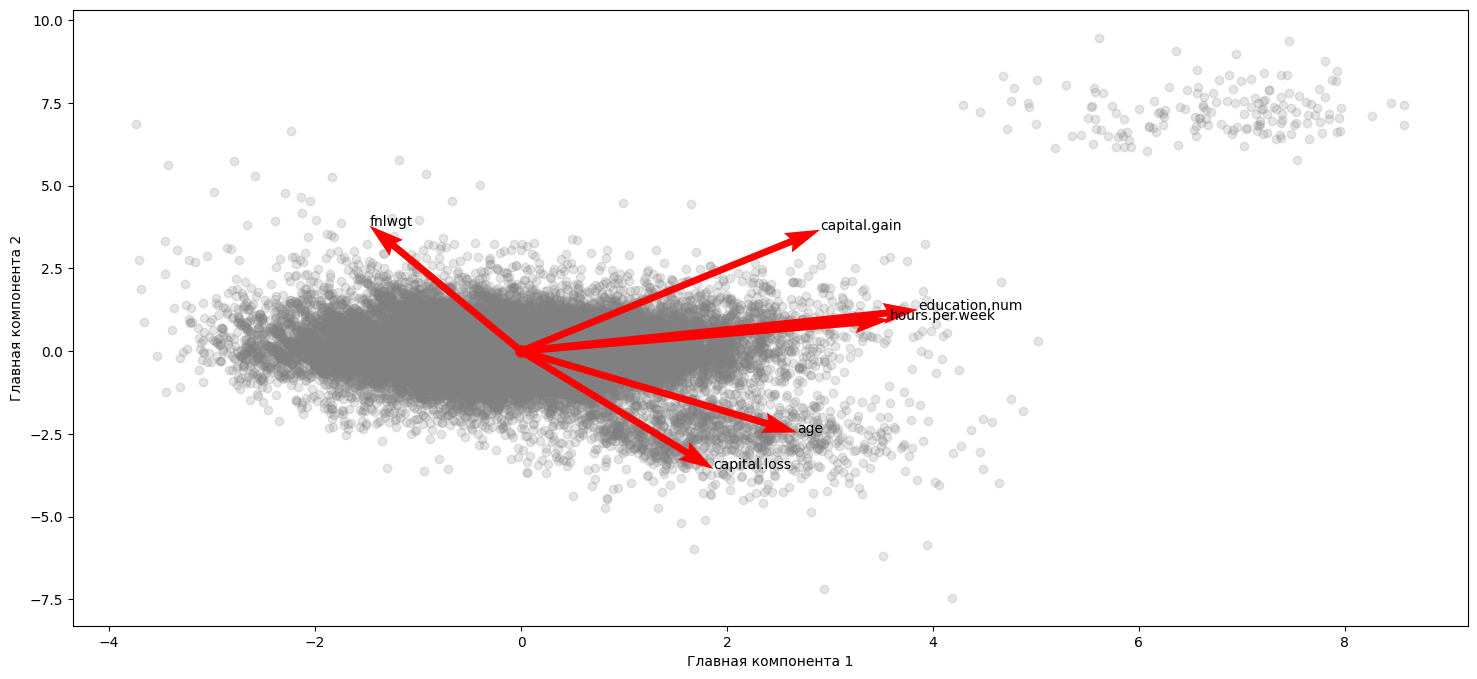

In [60]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

componetns_scale = 7

plt.figure(figsize=(18, 8))

scaler = StandardScaler()
pca = PCA(n_components=2)

x_train_norm = scaler.fit_transform(xs_noCat)

X_pca = pca.fit_transform(x_train_norm)
pca_components = pca.components_[:2, :]
plt.scatter(X_pca[:, 0], X_pca[:, 1], color='grey', alpha=0.2)
plt.scatter(0, 0, color='red', lw=3)
for i, feature in enumerate(xs_noCat.columns):
    plt.quiver(0, 0, pca_components[0, i]*componetns_scale, pca_components[1, i]*componetns_scale, angles='xy', scale_units='xy', scale=1, color='red', width=0.005)
    plt.annotate(feature, (pca_components[0, i]*componetns_scale, pca_components[1, i]*componetns_scale), color='black')

plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.show()